## Import element information from pymatgen

In [ ]:
# Uncomment the subsequent lines in this cell to install dependencies for Google Colab.
# !pip install pymatgen==2022.7.19

In [ ]:
from pymatgen.core import Element

symbol = "Fe"
el = Element(symbol)
elec_structure = el.full_electronic_structure

## Plotting the electronic structure

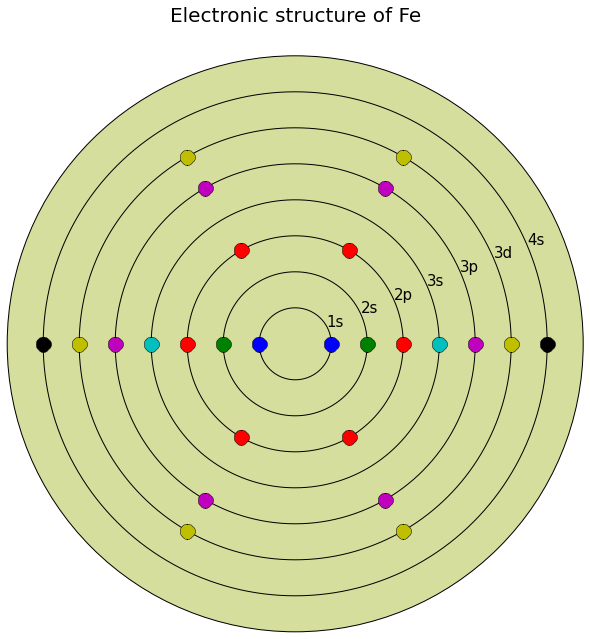

In [ ]:
%matplotlib inline

from matplotlib.pyplot import figure, grid, rc, show

rc("grid", color="#316931", linewidth=0, linestyle="-")
rc("xtick", labelsize=15)
rc("ytick", labelsize=15)
import numpy as np

# make a square figure
fig = figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, axisbg="#d5de9c")

rticks = []
rlabels = []
for i, shell in enumerate(elec_structure):
    # Draw the shell
    r = 0.5 * (i + 1)
    rad = [r] * 1000
    theta = [2 * np.pi * j / 1000 for j in xrange(1000)]
    ax.plot(theta, rad, "k-", lw=1)
    # Draw the electrons
    rad = [r] * shell[2]
    theta = [2 * np.pi * j / shell[2] for j in xrange(shell[2])]
    ax.plot(theta, rad, "o", markersize=15)
    rticks.append(r)
    rlabels.append(f"{shell[0]}{shell[1]}")

ax.set_rmax(r + 0.5)

ax.set_thetagrids([0, 90, 180, 270], [""] * 4, color="k")
ax.set_rgrids(rticks, rlabels)
ax.set_title(f"Electronic structure of {symbol}", fontsize=20)
grid(True)
show()